In [2]:
%load_ext autoreload
%autoreload 2
%cd '~/deepshape/deepshape'

/home/jorgen/deepshape/deepshape


In [3]:
import torch 
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

import time

In [4]:
from layers import FourierLayer2D
from palais_layer import *
from surfaces import *
from visual import get_plot_data
from networks import ReparametrizationNetwork2D
from curves import LogStepDiff

In [5]:
# TODO: Create example surfaces library, and load from there.
C = (
    lambda x: x[..., 0],
    lambda x: x[..., 1],
    lambda x: x[..., 0]**2 + x[..., 1]**2
)

C = (
    lambda x: torch.sin(2*np.pi*x[..., 0]),
    lambda x: torch.sin(4*np.pi*x[..., 0]),
    lambda x: x[..., 1]
)

f = Surface(C)
γ = Diffeomorphism(
    (
        lambda x: (0.5 * torch.log(20*x[..., 0]+1) / torch.log(21*torch.ones(1)) 
          + 0.25 * (1 + torch.tanh(20*(x[..., 0]-0.5)) / torch.tanh(21*torch.ones(1)))),
        lambda x: 0.9*x[..., 1]**2 + 0.1 * x[..., 1]))

g = f.compose(γ)
q = Qmap(g)
r = Qmap(f)

In [6]:
# Get color normalizer
k = 32
fcolors = get_plot_data(f.volume_factor, k=k).squeeze()
gcolors = get_plot_data(g.volume_factor, k=k).squeeze()
norm = colors.Normalize(vmin=min(fcolors.min(), gcolors.min()), vmax=max(fcolors.max(), gcolors.max()))

In [7]:
# Create Datapoints
# TODO: Create Dataloader
k = 32
K = k**2
X = torch.rand(K, 2)
X, Y = torch.meshgrid((torch.linspace(0, 1, k), torch.linspace(0, 1, k)))
X, Y = X.reshape(-1, 1), Y.reshape(-1, 1)
X = torch.cat((X, Y), dim=1)

In [ ]:
opt - 

In [1]:
bfgs_iter = 10
iterations = 5

# Instantiate a L-layer network with N basis functions per layer.
RN = ReparametrizationNetwork2D(5, 5)
optimizer = optim.LBFGS(RN.parameters(), lr=1., max_iter=bfgs_iter)# , line_search_fn="strong_wolfe")

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, threshold=0.,
                                                 threshold_mode='rel', cooldown=20, min_lr=1e-3, eps=1e-08, verbose=True)
loss = nn.MSELoss()



tic = time.time()
printiter= 20
errors = np.empty(bfgs_iter * iterations)
errors[:] = np.nan

for i in range(iterations):
    inner = [0]
    def closure():
        # Set gradient buffers to` zero.
        optimizer.zero_grad()
        
        with torch.no_grad():
            Z = X
            for layer in RN.layers:
                layer.project(Z, 1e-3, 1e-3)
                Z, _ = layer(Z)

        Q = q(X)
        R = RN.reparametrized(r, X)

        # Compute loss, and perform a backward pass and gradient step
        l = loss(Q, R)
        l.backward()
        scheduler.step(l)
        errors[i* bfgs_iter + inner[0]] = l.item()
        inner[0] += 1

        
        print('[Iter %5d] loss: %.6f' % (i + 1, l))
        return l
    
    optimizer.step(closure)
#     scheduler.step(closure())

                
    # Should insert projection step here as well (has not been necessary until now) 
toc = time.time()

# with torch.no_grad():
#     Z = X
#     for layer in RN.layers:
#         layer.project(Z, 1e-2, 1e-3)
#         Z, _ = layer(Z)

print()
print(f'Finished training in {toc - tic:.5f}s')

NameError: name 'ReparametrizationNetwork2D' is not defined

In [1]:
plt.plot(errors)

NameError: name 'plt' is not defined

In [17]:
bfgs_iter = 10
iterations = 5

# Instantiate a L-layer network with N basis functions per layer.
RN = ReparametrizationNetwork2D(5, 5, layer_type=PalaisLayer2D)
optimizer = optim.LBFGS(RN.parameters(), lr=1e-1, max_iter=bfgs_iter)# , line_search_fn="strong_wolfe")

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, threshold=0.,
                                                 threshold_mode='rel', cooldown=20, min_lr=1e-3, eps=1e-08, verbose=True)
loss = nn.MSELoss()



tic = time.time()
printiter= 20
errors2 = np.empty(bfgs_iter * iterations)
errors2[:] = np.nan

for i in range(iterations):
    inner = [0]
    def closure():
        # Set gradient buffers to zero.
        optimizer.zero_grad()
        
        with torch.no_grad():
            Z = X
            for layer in RN.layers:
                layer.project(Z, 1e-3, 1e-3)
                Z, _ = layer(Z)

        Q = q(X)
        R = RN.reparametrized(r, X)

        # Compute loss, and perform a backward pass and gradient step
        l = loss(Q, R)
        l.backward()
        scheduler.step(l)
        errors2[i* bfgs_iter + inner[0]] = l.item()
        inner[0] += 1

        
        print('[Iter %5d] loss: %.6f' % (i + 1, l))
        return l
    
    optimizer.step(closure)

                
    # Should insert projection step here as well (has not been necessary until now) 
toc = time.time()

# with torch.no_grad():
#     Z = X
#     for layer in RN.layers:
#         layer.project(Z, 1e-2, 1e-3)
#         Z, _ = layer(Z)

print()
print(f'Finished training in {toc - tic:.5f}s')

[Iter     1] loss: 3.627906
[Iter     1] loss: 3.035786
[Iter     1] loss: 2.994347
[Iter     1] loss: 2.936487
[Iter     1] loss: 2.840693
[Iter     1] loss: 2.704084
[Iter     1] loss: 2.544898
[Iter     1] loss: 2.399311
[Iter     1] loss: 1.968165
[Iter     1] loss: 1.343045
[Iter     2] loss: 1.151175
[Iter     2] loss: 1.101772
[Iter     2] loss: 1.017047
[Iter     2] loss: 0.889192
[Iter     2] loss: 0.745668
[Iter     2] loss: 0.603449
[Iter     2] loss: 0.473979
[Iter     2] loss: 0.362472
[Iter     2] loss: 0.294366
[Iter     2] loss: 0.254866
[Iter     3] loss: 0.228407
[Iter     3] loss: 0.206532
[Iter     3] loss: 0.187127
[Iter     3] loss: 0.169582
[Iter     3] loss: 0.153659
[Iter     3] loss: 0.139163
[Iter     3] loss: 0.125944
[Iter     3] loss: 0.113767
[Iter     3] loss: 0.102217
[Iter     3] loss: 0.091644
[Iter     4] loss: 0.083059
[Iter     4] loss: 0.075926
[Iter     4] loss: 0.068981
[Iter     4] loss: 0.063208
[Iter     4] loss: 0.058477
[Iter     4] loss: 0

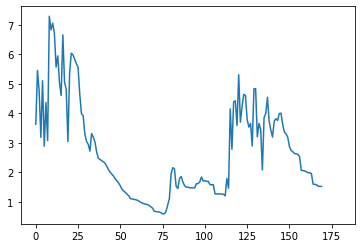

In [11]:
plt.plot(errors2)

In [208]:
z=np.arange(1, len(errors)+1) #start at 1, to avoid error from log(0)

logA = np.log(z) #no need for list comprehension since all z values >= 1

m, c = np.polyfit(logA, logB, 1, w=np.sqrt(y)) # fit log(y) = m*log(x) + c
y_fit = np.exp(m*logA + c) # calculate the fitted values of y 

NameError: name 'logB' is not defined

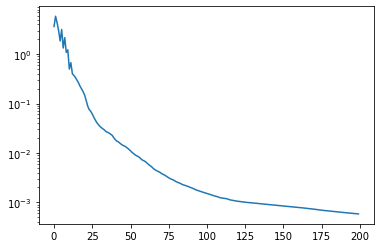

In [209]:
plt.semilogy(errors)

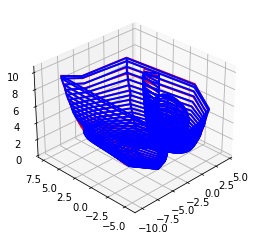

In [210]:
Zq = get_plot_data(q, k=64)
Zr = get_plot_data(r, k=64)
Zh = get_plot_data(lambda x: RN.reparametrized(r, x), k=64)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(*Zq, color='r')
ax.plot_wireframe(*Zh, color='b', lw=2.)
# ax.plot_wireframe(*Zr, color='k')

ax.view_init(30, -135)
plt.show()

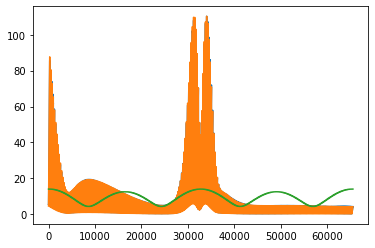

In [211]:
plt.plot(fafcolors.flatten())
plt.plot(gcolors.flatten())
plt.plot(fcolors.flatten())

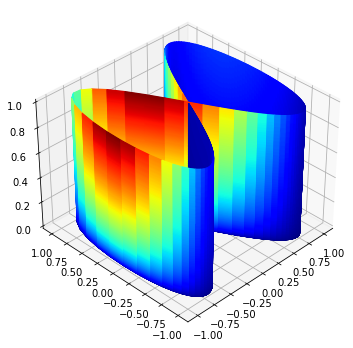

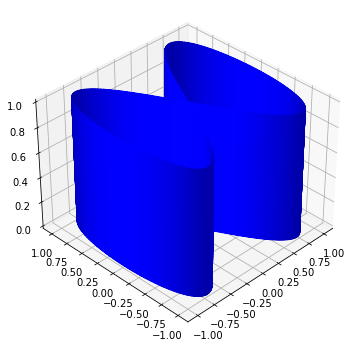

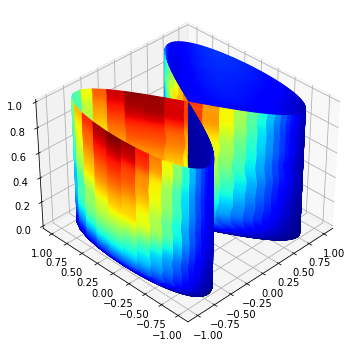

In [212]:
k = 256
Z = get_plot_data(g, k=k)
gcolors = get_plot_data(g.volume_factor, k=k).squeeze()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(*Z, shade=False, facecolors=cm.jet(norm(gcolors)), rstride=1, cstride=1)
ax.view_init(35, 225)
plt.show()

Z = get_plot_data(f, k=k)
fcolors = get_plot_data(f.volume_factor, k=k).squeeze()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(*Z, shade=False, facecolors=cm.jet(norm(fcolors)), rstride=1, cstride=1)
ax.view_init(35, 225)
plt.show()

fafter = f.compose(lambda x: RN(x)[0])
Z = get_plot_data(fafter, k=k)
fafcolors = get_plot_data(fafter.volume_factor, k=k).squeeze()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(*Z, shade=False, facecolors=cm.jet(norm(fafcolors)), rstride=1, cstride=1)
ax.view_init(35, 225)
plt.show()